#Neural Nets and Deep Learning project 2

Project Brief - Project2_NN_Digit_Classification_brief_updated.pdf

Data - https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

The objective of the project is to learn how to implement a simple image classification pipeline
based on a deep neural network. The goals of this project are as follows:

● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

● Data fetching and understand the train/test splits. (5 points)

● Implement and apply a deep neural network classifier including (15 points)

● Implement batch normalization for training the neural network (5 points)

● Print the classification accuracy metrics (10 points)


In [0]:
# importing libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [0]:
#importing train test split
from sklearn.model_selection import train_test_split

#for calculating accuracy, confusion matrix, f1_score:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve

In [0]:
import h5py
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
import warnings 
warnings.filterwarnings('ignore')

#1. Loading and reading dataset: 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive')

In [0]:
h5FilePath="/content/drive/My Drive/SVHN_single_grey1.h5"

df = h5py.File(h5FilePath,"r")


In [0]:
#Getting Keys from h5py object
keys=df.keys()
for key in keys:
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
#Retrieving Train, Test and Validation data along with Label
X_train=df['X_train'][:]
y_train=df['y_train'][:]

X_test=df['X_test'][:]
y_test=df['y_test'][:]

X_val=df['X_val'][:]
y_val=df['y_val'][:]

In [0]:
#Train Y label unique value
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#Get Test Y label unique value
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#Get Test Y label unique value
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#Closing h5 file
df.close()

In [0]:
#printing shape of training set, validation set and test set:
print("Training Set",X_train.shape, y_train.shape )
print("Validation Set",X_val.shape, y_val.shape )
print("Test Set",X_test.shape, y_test.shape )

Training Set (42000, 32, 32) (42000,)
Validation Set (60000, 32, 32) (60000,)
Test Set (18000, 32, 32) (18000,)


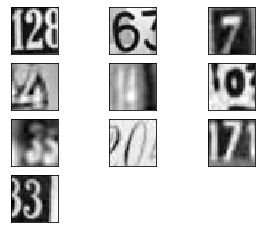

Label for each of the above image:
 [2, 6, 7, 4, 4, 0, 3, 0, 7, 3]


In [0]:
# Visualizing first 10 train data with label
labels = []

plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    lbl=y_train[i]
    labels.append(lbl)
plt.show()
print("Label for each of the above image:\n", labels)

# 2. Converting train, test and validation data labels to one hot vectors

In [0]:
num_classes = 10 

# Convert class vectors to binary class matrices:

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [0]:
print(y_train.shape)
print('First 5 examples are: \n', y_train[0:5])

(42000, 10)
First 5 examples are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# 3. Normalize the Train, Test and Validation image data

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# 4. Reshape the data from 32x32 to 32x32x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
X_val = X_val.reshape((X_val.shape[0], 32, 32, 1))

In [0]:
print("Training Set",X_train.shape )
print("Validation Set",X_val.shape )
print("Test Set",X_test.shape )

Training Set (42000, 32, 32, 1)
Validation Set (60000, 32, 32, 1)
Test Set (18000, 32, 32, 1)


# 5. Building model:

In [0]:
#Initializing model
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.Flatten())

#Add - Dense Layer of 128 Nurons with Relu
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add - Dense Layer/output layer of 10 Neurons with Softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# compiling model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fitting the model
m_history=model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 68s 2ms/sample - loss: 2.2329 - acc: 0.1973 - val_loss: 1.9851 - val_acc: 0.3498
Epoch 2/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.5160 - acc: 0.5250 - val_loss: 1.3240 - val_acc: 0.5889
Epoch 3/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.1597 - acc: 0.6455 - val_loss: 1.0449 - val_acc: 0.6838
Epoch 4/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.0419 - acc: 0.6811 - val_loss: 1.0640 - val_acc: 0.6683
Epoch 5/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.9594 - acc: 0.7074 - val_loss: 1.0567 - val_acc: 0.6755
Epoch 6/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.8983 - acc: 0.7291 - val_loss: 0.9068 - val_acc: 0.7292
Epoch 7/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.8419 - acc: 0.7463 - val_loss: 0.

In [0]:
# listinf all data in history
print(m_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Ploting Model Fit output for Training & Validation Data

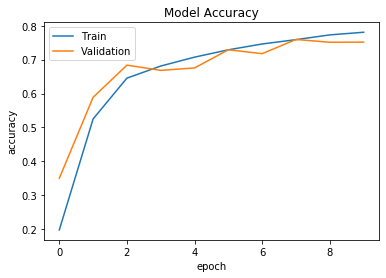

In [0]:
plt.plot(m_history.history['acc'])
plt.plot(m_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


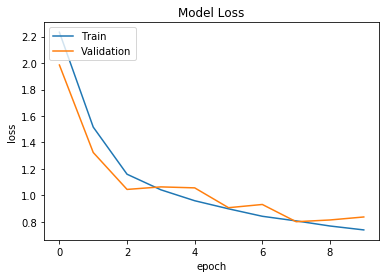

In [0]:
plt.plot(m_history.history['loss'])
plt.plot(m_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluating Model with Test Data:

In [0]:
model_result=model.evaluate(X_test,y_test,verbose=1)

18000/18000 [==============================] - 5s 301us/sample - loss: 0.9082 - acc: 0.7357


In [0]:
print("Model Accuracy : {0}".format(model_result[1]*100))


Model Accuracy : 73.56666922569275


In [0]:
print("Model Loss : {0}".format(model_result[0]*100))


Model Loss : 90.82309820122188


In [0]:
#calculating model summary: 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,688,138
Trainable params: 3,688,138
Non-trainable params: 0
_________________________________________________________________
